# Домашнее задание №2
## 1. Алгоритм W(U)PGMA.

In [4]:
"""Filogenetics algorithms W(U)PGMA."""

def pgma(M, type='w'):
    """Function.

    It implements WPGMA or UPGMA
    philogenetics algorithms.
    M - distance matrix(list).
    """
    n = len(M)
    sets = {str(M[0][i]): None for i in range(1, n)}

    while len(M) > 2:
        n = len(M)
        
        # finding minimum:
        p_i = 1
        p_j = 2
        min = M[p_i][p_j]
        for i in range(1, n):
            for j in range(i + 1, n):
                if M[i][j] < min:
                    min = M[i][j]
                    p_i = i
                    p_j = j

        if n == 3:
            new_node = 'root'
        else:
            new_node = str(M[p_i][0])+str(M[0][p_j])
        sets[new_node] = (str(M[p_i][0]), str(M[0][p_j]), M[p_i][p_j]/2)

        # new matrix counting:

        if p_i < p_j:
            indices = list(range(p_i)) + list(range(p_i + 1, p_j)) + \
                      list(range(p_j + 1, n))
        else:
            indices = list(range(p_j)) + list(range(p_j + 1, p_i)) + \
                      list(range(p_i + 1, n))

        new_column = [new_node]
        for i in indices:
            if i > 0:
                d1 = M[i][p_i] if M[i][p_i] else M[p_i][i]
                d2 = M[p_j][i] if M[p_j][i] else M[i][p_j]
                if type == 'w':
                    new_column.append((d1+d2)/2)
                else:
                    new_column.append((d2*len(M[0][p_j]) +\
                                       d1*len(M[i][0])) /\
                                      (len(M[0][p_j]) + \
                                       len(M[p_i][0])))
        new_column.append(None)

        M = [[M[i][j] for j in indices] for i in indices]
        M.append([new_node] + [None] * (n - 3))
        for i in range(n - 1):
            M[i].append(new_column[i])
            
        # Newick format creating:
        def recur(sets, root='root'):
            if not sets[root]:
                return root
            else:
                if len(sets[root][0]) > 1:
                    left = '('+ recur(sets, sets[root][0]) + ')'+':'+str(sets[root][2]-sets[sets[root][0]][2])+','
                else:
                    left = recur(sets, sets[root][0]) +':'+str(sets[root][2])+','
                if len(sets[root][1]) > 1:
                    right = '('+ recur(sets, sets[root][1]) + ')'+':'+str(sets[root][2]-sets[sets[root][1]][2])
                else:
                    right = recur(sets, sets[root][1])+':'+str(sets[root][2])
                return left + right

    newick = '('+recur(sets)+');'

    print(newick)
    return(newick)

In [5]:
from ete3 import Tree, NodeStyle, TreeStyle

def vis_tree(t_newick):
    t = Tree(t_newick)
    # Basic tree style
    ts = TreeStyle()
    ts.show_leaf_name = True

    # Draws nodes as small red spheres of diameter equal to 10 pixels
    nstyle = NodeStyle()
    # nstyle["shape"] = "sphere"
    # nstyle["size"] = 10
    nstyle["fgcolor"] = "blue"

    # Gray dashed branch lines
    nstyle["hz_line_type"] = 3
    nstyle["hz_line_color"] = "#aaaaaa"
    # Applies the same static style to all nodes in the tree. Note that,
    # if "nstyle" is modified, changes will affect to all nodes
    for n in t.traverse():
        
        n.set_style(nstyle)
    return t.render("%%inline", tree_style=ts)

### Test 1.
### WPGMA

(A:7.25,(B:4.0,(C:2.0,D:2.0):2.0):3.25);


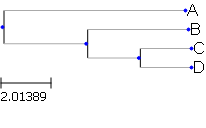

In [6]:
M = [[None, 'A', 'B', 'C', 'D'],
     ['A', None, 16, 16, 10],
     ['B', None, None, 8, 8],
     ['C', None, None, None, 4],
     ['D', None, None, None, None]]

vis_tree(pgma(M))

### UPGMA

(A:7.0,(B:4.0,(C:2.0,D:2.0):2.0):3.0);


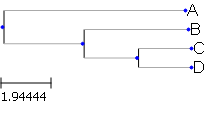

In [7]:
vis_tree(pgma(M, 'U'))

### Test 2.
### WPGMA

(F:4.5,((D:2.5,E:2.5):1.5,(B:3.0,(A:2.0,C:2.0):1.0):1.0):0.5);


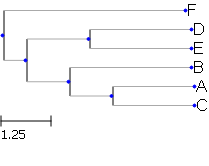

In [8]:
M = [[None, 'A', 'B', 'C', 'D', 'E', 'F'],
     ['A', None, 5, 4, 7, 6, 8],
     ['B', None, None, 7, 10, 9, 11],
     ['C', None, None, None, 7, 6, 8],
     ['D', None, None, None, None, 5, 9],
     ['E', None, None, None, None, None, 8],
     ['F', None, None, None, None, None, None]]

vis_tree(pgma(M))

### UPGMA

((B:3.0,(A:2.0,C:2.0):1.0):5.833333333333334,(F:4.25,(D:2.5,E:2.5):1.75):4.583333333333334);


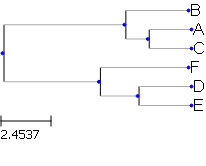

In [9]:
vis_tree(pgma(M,'u'))

## 2. Neighbour joining

In [41]:
def nj(M):

    n = len(M)
    sets = {str(M[0][i]): None for i in range(1, n)}

    def mirror(M):
        for i in range(len(M)):
            for j in range(i):
                M[i][j] = M[j][i]

    mirror(M)

    while len(M) > 3:
        n = len(M)

        # finding minimum:
        min = 1000000007
        for i in range(1, n):
            for j in range(i + 1, n):
                di = sum([M[i][k] for k in list(range(1, i))
                                         + list(range(i+1, j))
                                         + list(range(j+1, n))]) / (n-3)
                dj = sum([M[k][j] for k in list(range(1, i))
                                         + list(range(i+1, j))
                                         + list(range(j+1, n))]) / (n-3)
                Dij = M[i][j] - di -dj
                if Dij < min:
                    min = Dij
                    p_i = i
                    p_j = j
                    p_di = di
                    p_dj = dj

        new_node = str(M[p_i][0])+str(M[0][p_j])
        left_d = 0.5*(M[p_i][p_j] + p_di - p_dj)
        right_d = 0.5*(M[p_i][p_j] + p_dj - p_di)
        sets[new_node] = (str(M[p_i][0]), str(M[0][p_j]), left_d, right_d)

        # new matrix counting:

        indices = list(range(p_i)) + list(range(p_i + 1, p_j))\
                                   + list(range(p_j + 1, n))
        new_column = [new_node]
        for i in indices:
            if i > 0:
                d1 = M[i][p_i]
                d2 = M[p_j][i]
                new_column.append((d1+d2 - M[p_i][p_j])/2)
        new_column.append(None)

        M = [[M[i][j] for j in indices] for i in indices]
        M.append([new_node] + [None] * (n - 3))
        for i in range(n - 1):
            M[i].append(new_column[i])
        mirror(M)

    edge_list = [(M[0][1], M[0][2])]
    lenght_list = [M[1][2]]

    for key in sets.keys():
        if sets[key]:
            edge_list += [(key, sets[key][0]), (key, sets[key][1])]
            lenght_list += [sets[key][2], sets[key][3]]
    return (edge_list, lenght_list)

In [78]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
def draw_unroot(M):
    H = nx.Graph()
    edgelist, lengths = nj(M)
    n = len(edgelist)
    edgelist = [(edgelist[i][0],edgelist[i][1], {'len':round(lengths[i], 2)}) for i in range(n)]
    H.add_edges_from(edgelist)

    pos=nx.spring_layout(H)
    edge_labels=dict([((u,v,),d['len'])
                 for u,v,d in H.edges(data=True)])
    #print(edge_labels)
    labels=dict([(u[0], u[0] if len(u[0])==1 else '') for u in H.nodes(data=True)])
    #print(labels)

    nx.draw(H, with_labels=False, pos=pos, node_color="cyan", node_size=700)

    labels=nx.draw_networkx_labels(H,pos=pos, labels=labels)

    nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels)

### Test 1.

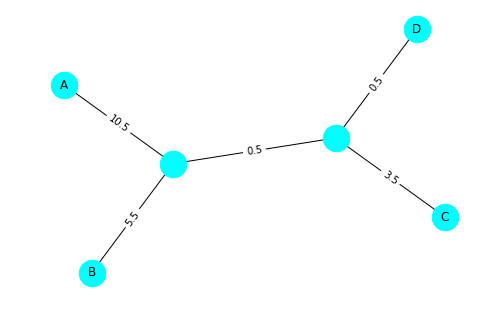

In [80]:
M = [[None, 'A', 'B', 'C', 'D'],
     ['A', None, 16, 16, 10],
     ['B', None, None, 8, 8],
     ['C', None, None, None, 4],
     ['D', None, None, None, None]]

draw_unroot(M)

### Test 2.

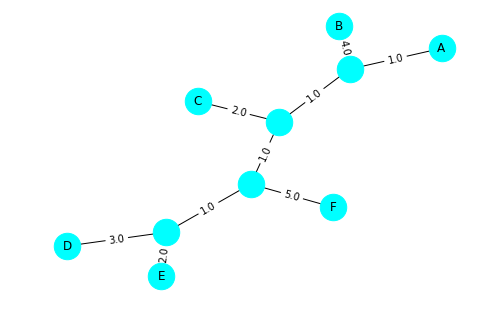

In [82]:
M = [[None, 'A', 'B', 'C', 'D', 'E', 'F'],
     ['A', None, 5, 4, 7, 6, 8],
     ['B', None, None, 7, 10, 9, 11],
     ['C', None, None, None, 7, 6, 8],
     ['D', None, None, None, None, 5, 9],
     ['E', None, None, None, None, None, 8],
     ['F', None, None, None, None, None, None]]

draw_unroot(M)